## Word2Vec Skip-Gram

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
def one_hot_encoding(word, word_dict):
    return np.eye(len(word_dict))[word_dict[word]]

In [3]:
def get_batch(dataset,batch_size):
    inputs = []
    labels = []
    random_index = np.random.choice(range(len(dataset)), batch_size, replace = False)
    
    for i in random_index:
        inputs.append(dataset[i][0])
        labels.append(dataset[i][1])
        
    return inputs, labels

In [4]:
# Model
class SkipGram(nn.Module):
    def __init__(self, voc_size, embedding_size):
        super(SkipGram, self).__init__()
        self.W = nn.Linear(voc_size, embedding_size, bias = False)
        self.W_p = nn.Linear(embedding_size, voc_size, bias = False)
    
    def forward(self, X):
        # [batch_size, voc_size]
        p_layer = self.W(X) # projection_layer : [batch_size,embedding_size]
        output = self.W_p(p_layer) # [batch_size, voc_size]
        return output

In [5]:
corpus = [
    'drink cold milk',
    'drink cold water',
    'drink cold cola',
    'drink sweet juice',
    'drink sweet cola',
    'eat delicious bacon',
    'eat sweet mango',
    'eat delicious cherry',
    'eat sweet apple',
    'juice with sugar',
    'cola with sugar',
    'mango is fruit',
    'apple is fruit',
    'cherry is fruit',
    'Berlin is Germany',
    'Boston is USA',
    'Mercedes from Germany',
    'Mercedes is car',
    'Ford from USA',
    'Ford is a car'
]

In [6]:
word_list = ' '.join(corpus).split()
word_set = list(set(word_list))
word_dict = {w:i for i, w in enumerate(word_set)}

In [7]:
word_dict

{'apple': 0,
 'delicious': 1,
 'from': 2,
 'cold': 3,
 'with': 4,
 'bacon': 5,
 'is': 6,
 'juice': 7,
 'USA': 8,
 'Germany': 9,
 'milk': 10,
 'Berlin': 11,
 'mango': 12,
 'sweet': 13,
 'Mercedes': 14,
 'Ford': 15,
 'fruit': 16,
 'Boston': 17,
 'cherry': 18,
 'eat': 19,
 'car': 20,
 'drink': 21,
 'cola': 22,
 'sugar': 23,
 'water': 24}

In [10]:
window_size = 3

dataset = []
for i in range(window_size, len(word_list) - window_size):
    context = [word_list[i-w] for w in range(window_size, 0, -1)] + [word_list[i+w] for w in range(1,window_size+1)]
    target = word_dict[word_list[i]]
    for t in context:
        dataset.append([one_hot_encoding(word_list[i], word_dict), target])

In [11]:
dataset[:3]

[[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0.]), 21],
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0.]), 21],
 [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0.]), 21]]

In [16]:
batch_size = 10
voc_size = len(word_dict)
embedding_size = 10
epochs = 10000

In [17]:
model = SkipGram(voc_size, embedding_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# train
for epoch in range(epochs):
    input_batch, label_batch = get_batch(dataset, batch_size)
    input_batch = torch.Tensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    optimizer.zero_grad()
    output = model(input_batch)
    
    loss = criterion(output, label_batch)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        print("Epoch : {}/{}, cost = {:.6f}".format(epoch+1, epochs, loss))

Epoch : 1000/10000, cost = 0.457806
Epoch : 2000/10000, cost = 0.066339
Epoch : 3000/10000, cost = 0.014759
Epoch : 4000/10000, cost = 0.007111
Epoch : 5000/10000, cost = 0.002545
Epoch : 6000/10000, cost = 0.001284
Epoch : 7000/10000, cost = 0.000862
Epoch : 8000/10000, cost = 0.000507
Epoch : 9000/10000, cost = 0.000291
Epoch : 10000/10000, cost = 0.000131


In [18]:
W, W_ = model.parameters()
W.shape

torch.Size([10, 25])

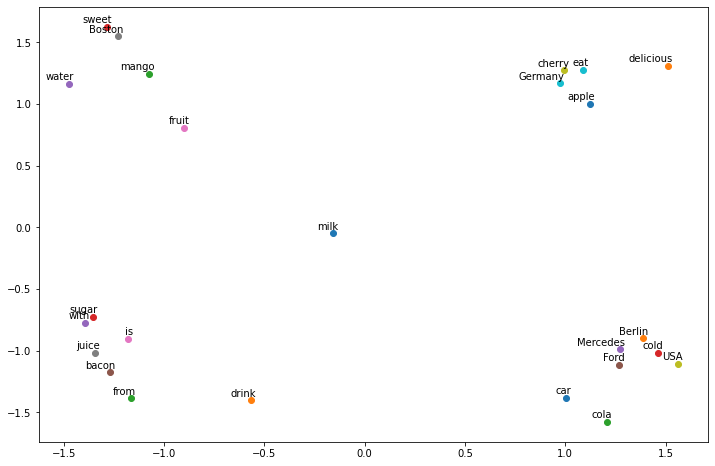

In [20]:
plt.figure(figsize = [12, 8])
for i, label in enumerate(word_dict):
    x, y = W[1][i].item(), W[2][i].item()
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()